In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgZ51YTv2lwONPsSZijxbKAalOSavvTt1CqrhUA57TqwpOw5InpNaY
Mounted at /content/drive


In [ ]:
import os 
os.chdir('/content/drive/MyDrive/HRL_GW')
!pwd

/content/drive/MyDrive/HRL_GW


In [ ]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

import torch.optim as optim

from envs.grid_world import GridWorld
from agents.hdqn_gw import hDQN, OptimizerSpec
from hdqn import hdqn_learning
from utils.plotting import plot_episode_stats, plot_visited_states
from utils.schedule import LinearSchedule


%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# run the tensorboard 


In [ ]:
NUM_EPISODES = 200#12000
BATCH_SIZE = 128
GAMMA = 1.0
REPLAY_MEMORY_SIZE = 10000000
LEARNING_RATE = 0.00025
ALPHA = 0.95
EPS = 0.01

optimizer_spec = OptimizerSpec(
    constructor=optim.RMSprop,
    kwargs=dict(lr=LEARNING_RATE, alpha=ALPHA, eps=EPS),
)

exploration_schedule = LinearSchedule(50000, 0.1, 1)

agent = hDQN(
    optimizer_spec=optimizer_spec,
    replay_memory_size=REPLAY_MEMORY_SIZE,
    batch_size=BATCH_SIZE,
)

env = GridWorld()

In [ ]:
agent, stats, visits = hdqn_learning(
    env=env,
    agent=agent,
    num_episodes=NUM_EPISODES,
    exploration_schedule=exploration_schedule,
    gamma=GAMMA,
)



starting the 0th episode 


completed 0 episodes
aeverage reward per episode is -9.0
average visits to key per episode is 0.15




/content/drive/My Drive/HRL_GW/agents/hdqn_gw.py:122: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return self.controller(Variable(joint_state_goal, volatile=True)).data.max(1)[1].cpu()


completed 20 episodes
aeverage reward per episode is 361.45
average visits to key per episode is 1.6




/content/drive/My Drive/HRL_GW/agents/hdqn_gw.py:113: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return self.meta_controller(Variable(state, volatile=True)).data.max(1)[1].cpu()


completed 40 episodes
aeverage reward per episode is -145.25
average visits to key per episode is 1.45


completed 60 episodes
aeverage reward per episode is 370.0
average visits to key per episode is 0.8


completed 80 episodes
aeverage reward per episode is 374.85
average visits to key per episode is 0.8


completed 100 episodes
aeverage reward per episode is -179.15
average visits to key per episode is 1.2


completed 120 episodes
aeverage reward per episode is -199.25
average visits to key per episode is 0.9


completed 140 episodes
aeverage reward per episode is 837.6
average visits to key per episode is 1.1


completed 160 episodes
aeverage reward per episode is -124.7
average visits to key per episode is 0.4


completed 180 episodes
aeverage reward per episode is 351.8
average visits to key per episode is 0.55


completed 200 episodes
aeverage reward per episode is 812.5
average visits to key per episode is 1.1


completed 220 episodes
aeverage reward per episode is 52.0
average

# New Section

In [ ]:
plot_episode_stats(stats)

NameError: ignored

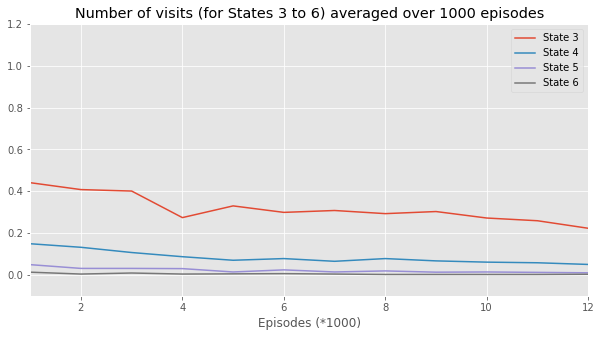

In [ ]:
plot_visited_states(visits, NUM_EPISODES)